# This is a sample Jupyter Notebook

Below is an example of a code cell.
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from matplotlib.pyplot import scatter
from pandas.core.interchange.dataframe_protocol import DataFrame
from scipy.special.cython_special import log1p
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro

def clean_data(df,list=None):
    y = df[['mpg']].copy()
    X = df.drop(list, axis=1).copy()
    num_attribs = X.select_dtypes(include=['int64','float64']).columns.tolist()
    cat_attribs = X.select_dtypes(include=['category']).columns.tolist()

    full_pipeline = ColumnTransformer([
        ('num',StandardScaler(), num_attribs),
        ('cat',OneHotEncoder(), cat_attribs)
    ])
    df_prepared = full_pipeline.fit_transform(X)
    feature_names = full_pipeline.get_feature_names_out()
    df_prepared = pd.DataFrame(df_prepared, columns=feature_names)
    train_X,test_X,train_y,test_y = train_test_split(df_prepared,y,test_size=0.25,random_state=42)
    return train_X,test_X,train_y,test_y


In [4]:
df = pd.read_csv('auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
df["car name"].unique()


array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [7]:
pd.DataFrame(df.nunique())

,0
mpg,129
cylinders,5
displacement,82
horsepower,94
weight,351
acceleration,95
model year,13
origin,3
car name,305


In [8]:
df.drop(columns="car name",axis=1, inplace=True)

In [9]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [10]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0


In [11]:
df.isin([0]).sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0


In [12]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [13]:
df.isin(["?"]).sum()


,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0


In [14]:
df['horsepower']= df['horsepower'].replace('?', np.nan)

In [15]:
df.isin([np.nan]).sum()


,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0


In [16]:
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
df[["horsepower"]]=imputer.fit_transform(df[["horsepower"]])

In [17]:
df.isin([np.nan]).sum()


,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


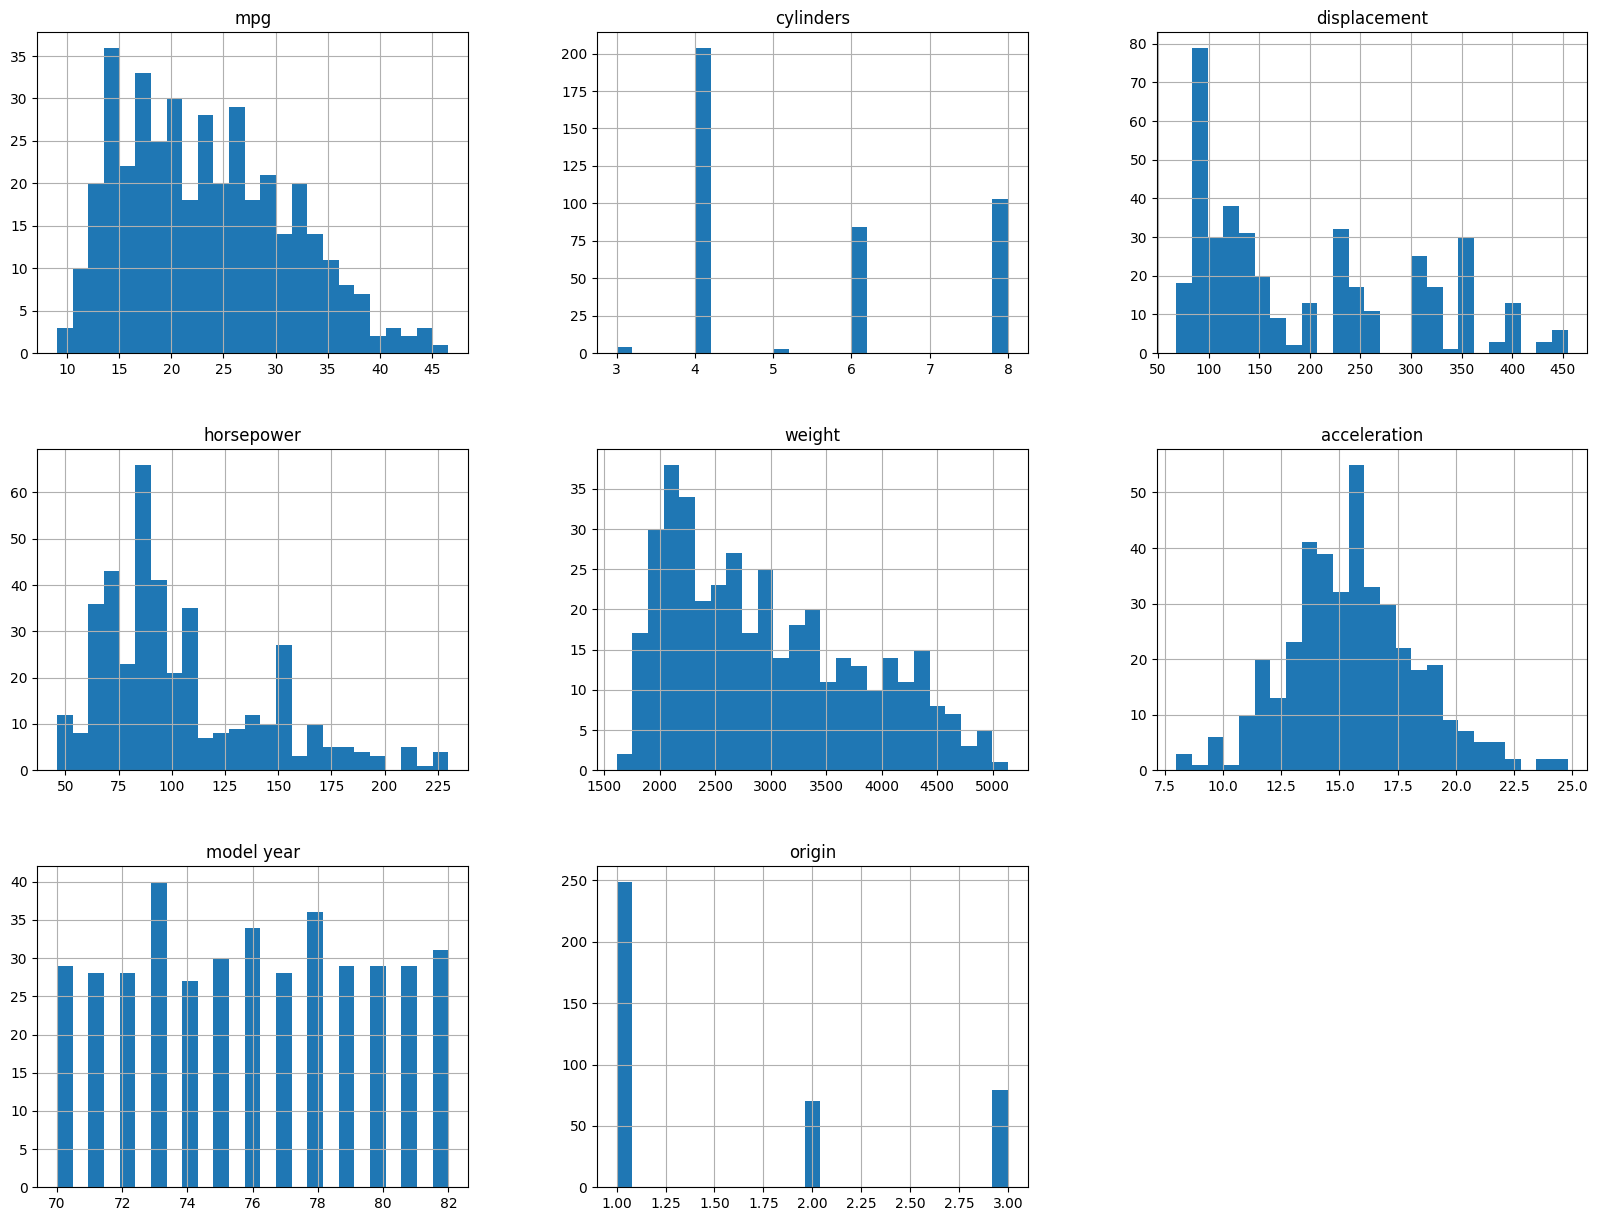

In [19]:
df.hist(bins=25, figsize=(20, 15))
plt.show()

In [20]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [21]:
#df['weight']=np.log1p(df['weight'])
#df['mpg']=np.log1p(df['mpg'])
#df['horsepower']=np.log1p(df['horsepower'])

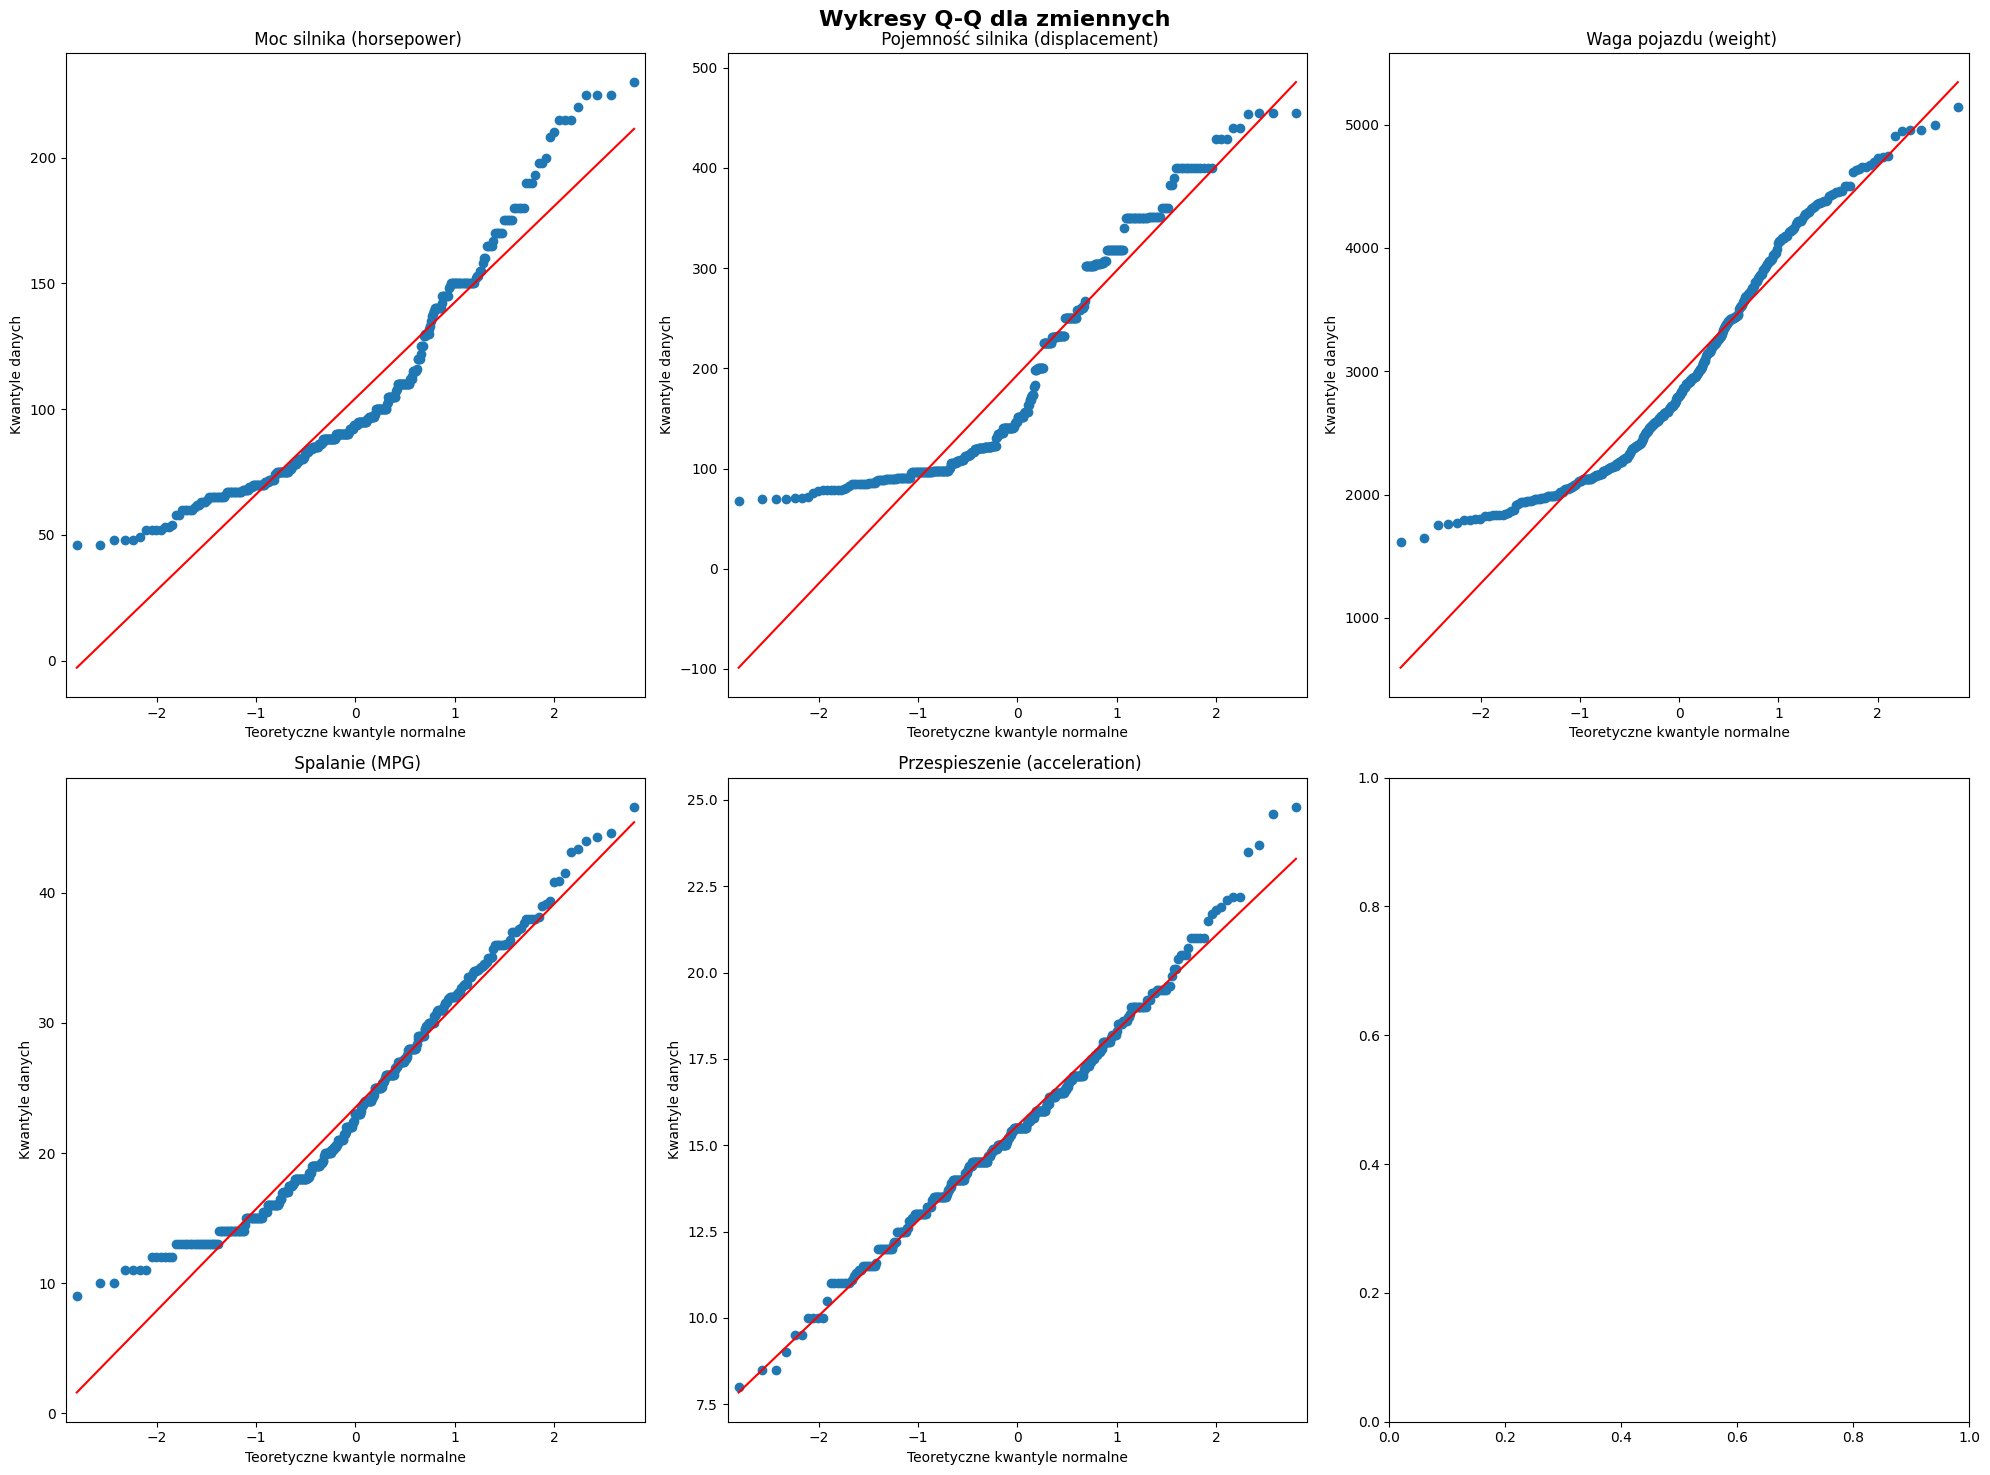

In [22]:
import statsmodels.api as sm



# Lista zmiennych do analizy
variables = ['horsepower', 'displacement', 'weight', 'mpg','acceleration']
titles = ['Moc silnika (horsepower)', 'Pojemność silnika (displacement)', 'Waga pojazdu (weight)', 'Spalanie (MPG)', 'Przespieszenie (acceleration)']

# Utworzenie subplotów 2x2
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Wykresy Q-Q dla zmiennych', fontsize=16, fontweight='bold')

# Generowanie wykresów Q-Q
for ax, var, title in zip(axes.flatten(), variables, titles):
    sm.qqplot(df[var], line='s', ax=ax)
    ax.set_title(f' {title}', fontsize=12)
    ax.set_xlabel('Teoretyczne kwantyle normalne')
    ax.set_ylabel('Kwantyle danych')

plt.tight_layout()
plt.show()

In [23]:
df['origin']=df['origin'].astype('category')
df['cylinders']=df['cylinders'].astype('category')

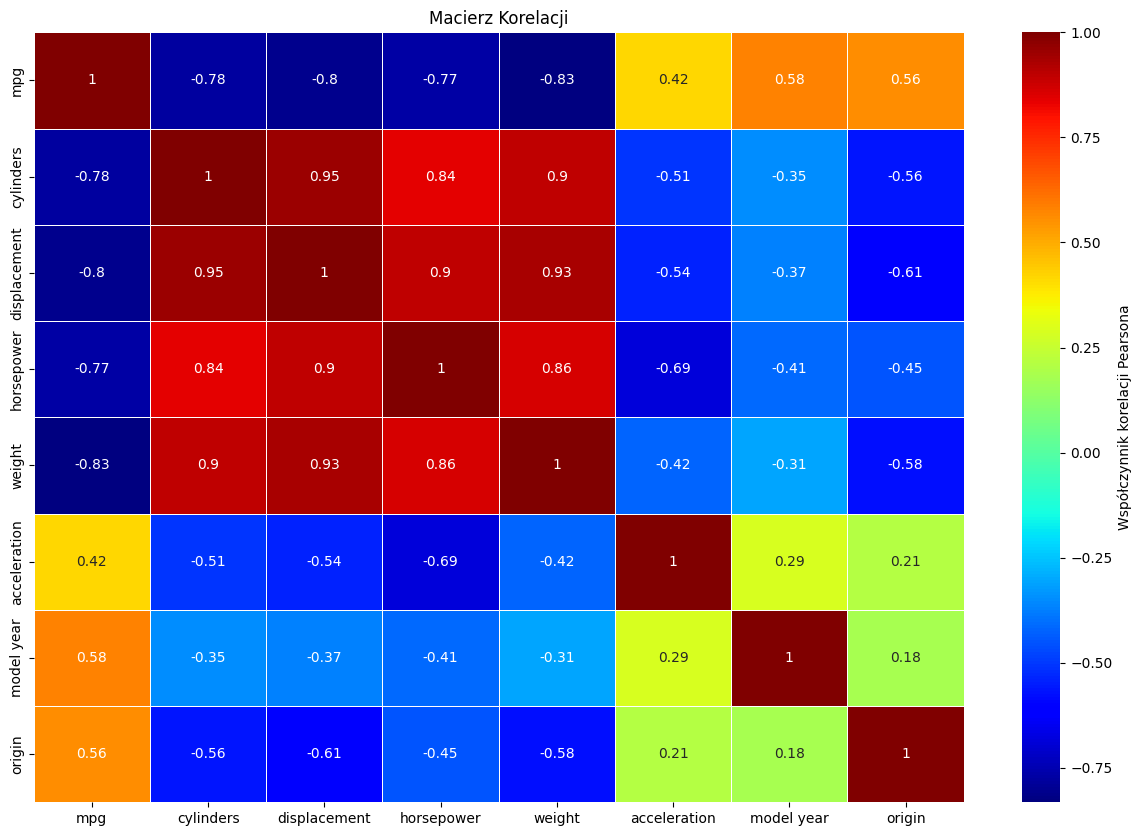

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),annot=True,cmap='jet',linewidths=.5,linecolor='white',cbar_kws={"label": 'Współczynnik korelacji Pearsona'})
plt.title('Macierz Korelacji')
plt.show()


In [25]:
abc = df.copy()

In [26]:
abc['cylinders']=abc['cylinders'].astype('int64')

In [27]:
y = df[['mpg']].copy()
X = df.drop('mpg', axis=1).copy()

num_attribs = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_attribs = X.select_dtypes(include=['category']).columns.tolist()
full_pipeline = ColumnTransformer([
    ('num',StandardScaler(), num_attribs),
    ('cat',OneHotEncoder(), cat_attribs)
])

In [28]:
df_prepared = full_pipeline.fit_transform(X)
feature_names = full_pipeline.get_feature_names_out()
df_prepared = pd.DataFrame(df_prepared, columns=feature_names)

In [29]:
df_prepared

,num__displacement,num__horsepower,num__weight,num__acceleration,num__model year,cat__cylinders_3,cat__cylinders_4,cat__cylinders_5,cat__cylinders_6,cat__cylinders_8,cat__origin_1,cat__origin_2,cat__origin_3
0,1.090604,0.673118,0.630870,-1.295498,-1.627426,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.503514,1.589958,0.854333,-1.477038,-1.627426,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.196232,1.197027,0.550470,-1.658577,-1.627426,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.061796,1.197027,0.546923,-1.295498,-1.627426,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.042591,0.935072,0.565841,-1.840117,-1.627426,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-0.513026,-0.479482,-0.213324,0.011586,1.621983,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
394,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
395,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
396,-0.705077,-0.662850,-0.408411,1.100822,1.621983,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
df_prepared.describe().round(2)

,num__displacement,num__horsepower,num__weight,num__acceleration,num__model year,cat__cylinders_3,cat__cylinders_4,cat__cylinders_5,cat__cylinders_6,cat__cylinders_8,cat__origin_1,cat__origin_2,cat__origin_3
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.0
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.01,0.51,0.01,0.21,0.26,0.63,0.18,0.2
std,1.00,1.00,1.00,1.00,1.00,0.10,0.50,0.09,0.41,0.44,0.48,0.38,0.4
min,-1.20,-1.53,-1.60,-2.75,-1.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
25%,-0.86,-0.74,-0.88,-0.63,-0.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
50%,-0.43,-0.28,-0.20,-0.02,-0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.0
75%,0.66,0.54,0.75,0.58,0.81,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.0
max,2.51,3.29,2.57,3.35,1.62,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0


In [31]:
train_X,test_X,train_y,test_y = train_test_split(df_prepared,y,test_size=0.2,random_state=42)

In [32]:
def features_engenering(df,list):
    y = df[['mpg']].copy()
    X = df.drop(list, axis=1).copy()
    num_attribs = X.select_dtypes(include=['int64','float64']).columns.tolist()
    cat_attribs = X.select_dtypes(include=['category']).columns.tolist()

    full_pipeline = ColumnTransformer([
        ('num',StandardScaler(), num_attribs),
        ('cat',OneHotEncoder(), cat_attribs)
    ])
    df_prepared = full_pipeline.fit_transform(X)
    feature_names = full_pipeline.get_feature_names_out()
    df_prepared = pd.DataFrame(df_prepared, columns=feature_names)
    train_X,test_X,train_y,test_y = train_test_split(df_prepared,y,test_size=0.25,random_state=42)
    models = [
    ('Linear Regression', LinearRegression()),
    ('ElasticNet', ElasticNet(random_state=42)),
    ('Lasso', Lasso(random_state=42)),
    ('Ridge', Ridge(random_state=42))
    ]
    results = []

    for name, model in models:
        pipeline = Pipeline([
            ('model', model)
        ])

        pipeline.fit(train_X, train_y)

        y_pred = pipeline.predict(test_X)

        r2 = r2_score(test_y, y_pred)
        mse = mean_squared_error(test_y, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(test_y, y_pred)

        results.append({
            'Model': name,
            'R²': r2,
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae
        })

    # Wyniki jako DataFrame
    results_df = pd.DataFrame(results)
    return results_df.sort_values('RMSE')

In [33]:
result=pd.DataFrame(features_engenering(df,['mpg','cylinders','horsepower','weight']))
result

,Model,R²,MSE,RMSE,MAE
3,Ridge,0.762845,13.466505,3.669674,2.826200
0,Linear Regression,0.762325,13.496034,3.673695,2.828115
2,Lasso,0.758186,13.731029,3.705540,2.893663
1,ElasticNet,0.718162,16.003725,4.000466,3.130778


In [34]:
result=pd.DataFrame(features_engenering(df,['mpg','displacement','horsepower','weight']))
result

,Model,R²,MSE,RMSE,MAE
3,Ridge,0.790610,11.889877,3.448170,2.739895
0,Linear Regression,0.790405,11.901546,3.449862,2.726248
2,Lasso,0.700538,17.004483,4.123649,3.405895
1,ElasticNet,0.630696,20.970381,4.579343,3.706640


In [35]:
result=pd.DataFrame(features_engenering(df,['mpg','displacement','cylinders','weight']))
result

,Model,R²,MSE,RMSE,MAE
3,Ridge,0.774831,12.785910,3.575739,2.718701
0,Linear Regression,0.773825,12.842989,3.583712,2.724023
2,Lasso,0.759370,13.663808,3.696459,2.965666
1,ElasticNet,0.721642,15.806128,3.975692,3.161937


In [36]:
result=pd.DataFrame(features_engenering(df,['mpg','displacement','cylinders','horsepower']))
result

,Model,R²,MSE,RMSE,MAE
3,Ridge,0.834684,9.387200,3.063854,2.394269
0,Linear Regression,0.834223,9.413390,3.068125,2.397430
2,Lasso,0.834007,9.425678,3.070127,2.381139
1,ElasticNet,0.785122,12.201508,3.493066,2.723948


In [37]:
result=pd.DataFrame(features_engenering(df,['mpg','displacement','cylinders','horsepower','weight']))
result

,Model,R²,MSE,RMSE,MAE
3,Ridge,0.630964,20.955135,4.577678,3.699646
0,Linear Regression,0.630317,20.991919,4.581694,3.698316
2,Lasso,0.557132,25.147618,5.014740,4.186504
1,ElasticNet,0.501684,28.296155,5.319413,4.439501


In [38]:
result=pd.DataFrame(features_engenering(df,['mpg','cylinders','origin']))
result

,Model,R²,MSE,RMSE,MAE
2,Lasso,0.833385,9.460974,3.075870,2.387363
0,Linear Regression,0.828903,9.715499,3.116970,2.520311
3,Ridge,0.828653,9.729674,3.119243,2.523042
1,ElasticNet,0.802092,11.237889,3.352296,2.606836


In [39]:
result=pd.DataFrame(features_engenering(df,['mpg','acceleration']))
result

,Model,R²,MSE,RMSE,MAE
0,Linear Regression,0.871082,7.320441,2.705631,2.108794
3,Ridge,0.870916,7.329844,2.707368,2.127526
2,Lasso,0.833385,9.460974,3.075870,2.387363
1,ElasticNet,0.810566,10.756701,3.279741,2.532137


In [40]:
result=pd.DataFrame(features_engenering(df,['mpg']))
result

,Model,R²,MSE,RMSE,MAE
0,Linear Regression,0.871196,7.313936,2.704429,2.110975
3,Ridge,0.871036,7.323039,2.706111,2.128684
2,Lasso,0.833385,9.460974,3.075870,2.387363
1,ElasticNet,0.810566,10.756701,3.279741,2.532137


In [41]:
X,X_test,y,y_test=clean_data(df,'mpg')

In [42]:
regressor=LinearRegression()
regressor.fit(X,y)
y_pred=regressor.predict(X_test)


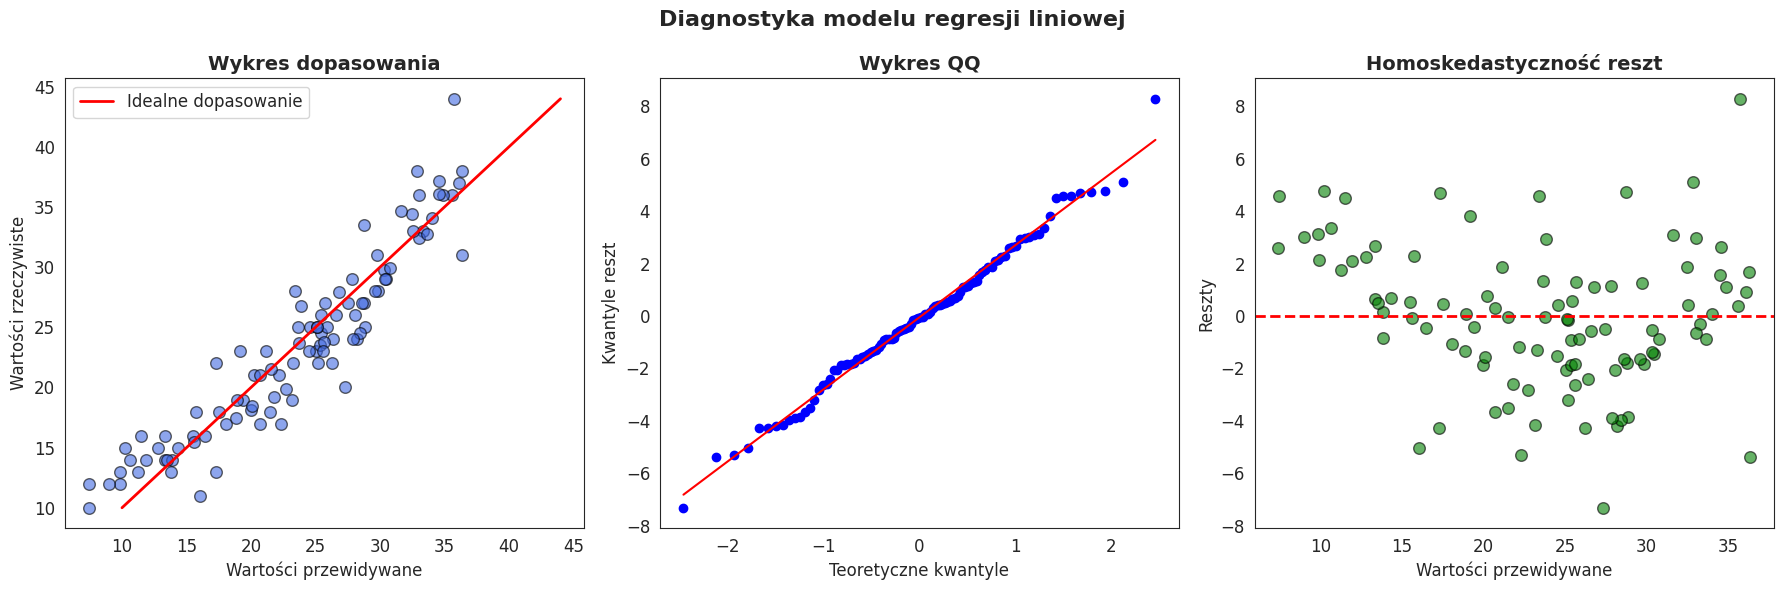

Test Shapiro-Wilka
P-value: 0.8798

Test Breuscha-Pagana:
 p-value: 0.7191
Nie ma dowodów na heteroskedastyczność (reszty są homoskedastyczne).


In [43]:


y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()

residuals = y_test - y_pred

sns.set_style("white")
plt.rcParams.update({'font.size': 12})

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle("Diagnostyka modelu regresji liniowej", fontsize=16, fontweight="bold")

axes[0].scatter(y_pred, y_test, alpha=0.6, edgecolors="black", color="royalblue", s=70)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             color="red", linewidth=2, linestyle="-", label="Idealne dopasowanie")
axes[0].set_title("Wykres dopasowania", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Wartości przewidywane")
axes[0].set_ylabel("Wartości rzeczywiste")
axes[0].legend()

stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title("Wykres QQ", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Teoretyczne kwantyle")
axes[1].set_ylabel("Kwantyle reszt")

axes[2].scatter(y_pred, residuals, alpha=0.6, color="green", edgecolors="black", s=70)
axes[2].axhline(y=0, color="red", linestyle="--", linewidth=2)
axes[2].set_title("Homoskedastyczność reszt", fontsize=14, fontweight="bold")
axes[2].set_xlabel("Wartości przewidywane")
axes[2].set_ylabel("Reszty")

plt.tight_layout()
plt.show()

_, p_value = shapiro(residuals)
print(f"Test Shapiro-Wilka\nP-value: {p_value:.4f}")
print("\nTest Breuscha-Pagana:")
X = sm.add_constant(y_pred)
try:
    lm_stat, lm_pvalue, f_stat, f_pvalue = het_breuschpagan(residuals, X)
    print(f" p-value: {lm_pvalue:.4f}")

    if lm_pvalue > 0.05:
        print("Nie ma dowodów na heteroskedastyczność (reszty są homoskedastyczne).")
    else:
        print("Heteroskedastyczność obecna!")
except ValueError as e:
    print(f"Błąd w teście Breuscha-Pagana: {str(e)}")
    print("Sprawdź wymiary danych:")
    print(f"residuals shape: {residuals.shape}")
    print(f"X shape: {X.shape}")